**B1: Montage de Google Drive dans l'environement Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**B2: Importation des bibliothèques et modules nécessaires**



In [ ]:
# Importation des bibliothèques nécessaires
import os  # Pour les opérations sur les fichiers et les répertoires
import torch  # Bibliothèque principale pour les réseaux de neurones et le calcul tensoriel
import numpy as np  # Manipulation de tableaux numériques
import matplotlib.pyplot as plt  # Tracé de graphiques
import seaborn as sns  # Visualisation avancée des données
from torch import nn, optim  # nn pour les modèles de réseaux de neurones, optim pour les algorithmes d'optimisation
from torch.utils.data import DataLoader, random_split  # Chargement et découpage des données
from torchvision import transforms, datasets  # Transformations d'images et ensembles de données préexistants
from torchsummary import summary  # Pour afficher un résumé du modèle
from torchvision import models  # Modèles pré-entraînés disponibles dans torchvision
from tqdm import tqdm  # Pour afficher une barre de progression lors des boucles
from sklearn.metrics import confusion_matrix, classification_report  # Évaluation des performances du modèle
import matplotlib.pyplot as plt  # Pour tracer des graphiques
from sklearn.metrics import classification_report, confusion_matrix  # Pour générer des rapports de classification et des matrices de confusion

**B3: Configuration de l'appareil d'exécution (GPU ou CPU)**



In [ ]:
# Vérification de l'utilisation du GPU
# Si un GPU compatible CUDA est disponible, il sera utilisé. Sinon, le CPU sera utilisé.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Affichage de l'appareil utilisé (GPU ou CPU)
print(f"Utilisation de l'appareil: {device}")

Utilisation de l'appareil: cuda


**B4: Vérification et configuration du chemin vers le dataset**

In [ ]:
# Configuration
data_dir = "/content/drive/MyDrive/AI_Health/chest_xray"  # Chemin du répertoire contenant les données
batch_size = 8  # Taille des lots (batch) pour l'entraînement, la validation et le test
num_classes = 2  # Nombre de classes dans le problème de classification (ici, classification binaire)
epochs = 6  # Nombre d'époques pour l'entraînement du modèle
patience = 3  # Nombre d'époques à attendre sans amélioration avant d'arrêter l'entraînement (early stopping)

In [ ]:

# Vérifie si le répertoire de données existe
def check_data_directory(XXX):
    """Vérifie si le répertoire des données existe."""
    XXX not os.path.exists(data_dir):  # Vérifie si le chemin du répertoire existe
        raise XXX(f"Répertoire {data_dir} inexistant. Veuillez vérifier le chemin.")

# Vérifier le répertoire des données
XXX(data_dir)

**B5: Définition des transformations d'images pour le modèle CNN**

In [ ]:
# Définit les transformations d'image pour l'entraînement et la validation
from torchvision import transforms

def get_image_transforms(image_size=(128, 128)):
    """Définit les transformations d'image pour l'entraînement et la validation."""
    transform_cnn = XXX.Compose([
        transforms.Grayscale(XXX),  # Convertit en niveaux de gris
        transforms.XXX(image_size),  # Redimensionne selon image_size
        transforms.ToTensor()  # Convertit en tenseur PyTorch
    ])

    return transform_cnn  # Retourne les transformations

# Charger les transformations
XXX = get_image_transforms()

**B6: Fonction de chargement des données**

In [ ]:
# Charge le dataset à partir d'un répertoire donné
def XXX(data_dir, transform):
    """Charge le dataset ImageFolder avec les transformations spécifiées."""
    XXX datasets.XXX(root=data_dir, transform=transform)
    # Utilise ImageFolder pour charger les images à partir du répertoire spécifié

# Charger le dataset
dataset = load_dataset(data_dir, XXX)

**B7: Fonction de chargement et de partitionnement des données**


In [ ]:
import torch
from torch.utils.data import random_split

# Divise le dataset en ensembles d'entraînement, validation et test avec des ratios 80%, 10%, 10%
def split_dataset(dataset):
    """Divise le dataset en ensembles d'entraînement (80%), validation (10%) et test (10%)."""

    # # Définir les ratios
    # train_ratio = 0.8
    # val_ratio = 0.1
    # test_ratio = 0.1

    # Calcule la taille de l'ensemble d'entraînement
    train_size = XXX(0.8 * len(XXX))

    # Calcule la taille de l'ensemble de validation
    XXX = int(0.1 * len(dataset))

    # La taille de l'ensemble de test est le reste des données
    test_size = XXX(dataset) - train_size - val_size

    # Utilise random_split pour diviser le dataset en trois sous-ensembles
    return random_split(dataset, [train_size, val_size, test_size])

# Exemple d'utilisation avec votre dataset
XXX, val_dataset, test_dataset = XXX(dataset)



**B8: Fonction de Création les DataLoaders pour chaque ensemble de données**

In [ ]:
# Crée les DataLoaders pour chaque ensemble de données
def create_dataloaders(train_dataset, val_dataset, test_dataset, batch_size):
    """Crée les DataLoaders pour l'entraînement, validation et test."""

    # Crée le DataLoader pour l'entraînement avec les options suivantes :
    # - batch_size: Taille de chaque lot
    # - shuffle: Mélange les données à chaque époque pour éviter les biais
    # - pin_memory: Assure que les données sont transférées plus rapidement vers le GPU
    # - num_workers: Le nombre de processus à utiliser pour charger les données
    train_loader = XXX(train_dataset, batch_size=batch_size, shuffle=XXX, pin_memory=True, num_workers=2)

    # Crée le DataLoader pour la validation (sans mélange des données)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=2)

    # Crée le DataLoader pour le test (sans mélange des données)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=2)

    # Retourne les DataLoaders pour l'entraînement, validation et test
    XXX train_loader, val_loader, test_loader

# Créer les DataLoaders
train_loader, val_loader, test_loader = XXX(train_dataset, val_dataset, test_dataset, XXX)


**B9: Visualisation de la répartition des ensembles de données (Train, Validation, Test)**

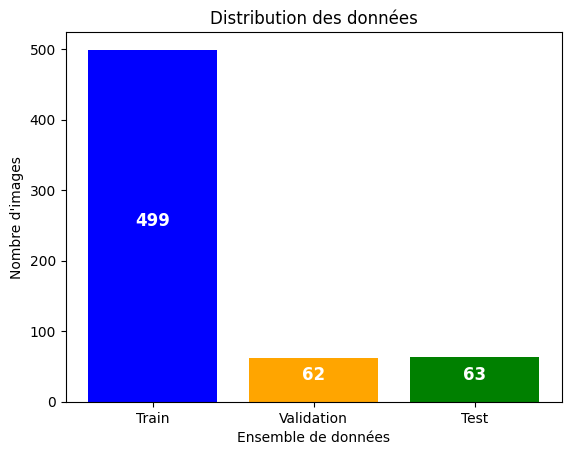

In [ ]:
# Affiche la distribution des données entre les ensembles
def display_data_distribution(train_dataset, XXX, test_dataset):
    """Affiche un graphique représentant la distribution des données."""

    # Crée un dictionnaire avec le nombre d'exemples pour chaque ensemble de données
    data_counts = {'Train': XXX(train_dataset), 'Validation': len(val_dataset), 'Test': len(test_dataset)}

    # Crée un graphique en barres avec les ensembles de données en abscisse et le nombre d'images en ordonnée
    XXX(data_counts.keys(), data_counts.XXX(), color=['blue', 'orange', 'green'])

    # Ajoute le nombre d'images au centre de chaque barre pour les afficher sur le graphique
    for i, (key, value) in enumerate(data_counts.items()):
        XXX(i, value / 2, str(value), ha='center', fontsize=12, fontweight='bold', color='white')

    # Ajoute des labels pour les axes et un titre pour le graphique
    plt.xlabel('Ensemble de données')
    plt.ylabel("Nombre d'images")
    plt.title("Distribution des données")

    # Affiche le graphique
    XXX

# Afficher la distribution des données
display_data_distribution(train_dataset, val_dataset, test_dataset)

**B10: Définition de l'architecture du Modèle CNN personnalisé**

In [ ]:
# Définition du modèle CNN
class CNN(nn.Module):
    """Modèle de réseau convolutif personnalisé."""
    def __init__(self):
        super(CNN, self).__init__()
        # Première couche convolutive (Conv2d)
        # Transforme une image avec 1 canal (niveaux de gris) en 32 cartes de caractéristiques
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()# Fonction d'activation ReLU

        # Opération de sous-échantillonnage avec un MaxPooling de taille 2x2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Deuxième couche convolutive, passant de 32 à 64 cartes de caractéristiques
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)

        # Calcul de la taille de la couche entièrement connectée après aplatissage
        # L'image de 128x128 est réduite à 128//4 (32x32) après deux applications de MaxPool2d (chaque MaxPool divise la taille par 2)
        self.flatten_size = 64 * (128 // 4) * (128 // 4)

        self.fc1 = nn.Linear(self.flatten_size, 128)# Première couche entièrement connectée (FC)
        self.fc2 = nn.Linear(128, 2)# Deuxième couche entièrement connectée, pour la classification binaire (2 classes)

    def forward(self, x):
        """Forward pass du modèle."""

        # Application de la première couche convolutive + activation ReLU + MaxPool
        x = self.pool(self.relu(self.conv1(x)))

        # Application de la deuxième couche convolutive + activation ReLU + MaxPool
        x = self.pool(self.relu(self.conv2(x)))

        # Aplatissement des données pour les passer dans une couche entièrement connectée
        x = x.view(x.size(0), -1)

        # Première couche entièrement connectée + activation ReLU
        x = self.relu(self.fc1(x))

        # Deuxième couche entièrement connectée (sortie)
        x = self.fc2(x)

        # Retourne la sortie du modèle (scores pour chaque classe)
        return x

In [ ]:
# Créer une instance du modèle
model = XXX.to(device)
XXX(model, (XXX))  # 1 seul canal pour une image grayscale, taille 128x128


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             320
              ReLU-2         [-1, 32, 128, 128]               0
         MaxPool2d-3           [-1, 32, 64, 64]               0
            Conv2d-4           [-1, 64, 64, 64]          18,496
              ReLU-5           [-1, 64, 64, 64]               0
         MaxPool2d-6           [-1, 64, 32, 32]               0
            Linear-7                  [-1, 128]       8,388,736
              ReLU-8                  [-1, 128]               0
            Linear-9                    [-1, 2]             258
Total params: 8,407,810
Trainable params: 8,407,810
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.06
Forward/backward pass size (MB): 13.50
Params size (MB): 32.07
Estimated Total Size (MB): 45.64
------------------------------------

**B11 : Hyperparamètres d'optimisation**

In [ ]:
# Définir la fonction de perte et l'optimiseur
criterion = nn.XXX()
XXX = optim.XXX(model.parameters(), XXX)
scheduler = optim.lr_scheduler.XXX(optimizer, step_size=5, gamma=0.1)

**B12: Fonction d'évaluation du modèle sur un ensemble de données**


In [ ]:

# Évalue le modèle sur un ensemble de données donné
def evaluate_model(model, data_loader, criterion, device):
    """Évalue le modèle sur un DataLoader donné."""
    # Définit le modèle en mode évaluation (désactive les fonctionnalités comme le dropout)
    model.eval()
    # Variables pour suivre la perte, le nombre d'exemples correctement classés et le nombre total d'exemples
    running_loss, correct, total = 0.0, 0, 0
    y_true, y_pred = [], []# Listes pour stocker les vraies étiquettes et les étiquettes prédites
    # Désactive la calcul de gradients pour accélérer l'évaluation (pas besoin pour la validation)
    with torch.no_grad():
        for images, labels in data_loader:# Itère sur les lots de données dans le DataLoader
            images, labels = images.to(device), labels.to(device)# Déplace les images et les labels vers le GPU (si disponible)
            outputs = model(images)# Effectue une prédiction avec le modèle
            # Calcule la perte entre les prédictions et les vraies étiquettes
            loss = criterion(outputs, labels)
            running_loss += loss.item()  # Accumule la perte pour la moyenne
            # Trouve la classe prédite (celle avec la probabilité maximale)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()# Compte le nombre de prédictions correctes
            total += labels.size(0)  # Nombre total d'exemples traités
            # Ajoute les valeurs vraies et prédites aux listes pour évaluer plus tard
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    avg_loss = running_loss / len(data_loader)# Calcule la perte moyenne pour l'ensemble de données
    accuracy = correct / total # Calcule l'exactitude (accuracy)
    return avg_loss, accuracy, y_true, y_pred# Retourne la perte moyenne, l'exactitude, et les labels vrais/prédits



**B13: Fonction d'entraînement du modèle avec suivi des pertes et précisions**

In [ ]:
# Entraîne le modèle avec early stopping et learning rate scheduler
def train_model(model, train_loader, val_loader, test_loader, criterion, optimizer, scheduler, device, epochs, patience):
    """Entraîne le modèle avec early stopping et affiche les métriques."""
    # Initialisation des variables pour suivre la meilleure perte de validation et le nombre de périodes de patience
    best_val_loss = float('inf')
    patience_counter = 0
    # Listes pour stocker les pertes et précisions des ensembles d'entraînement, validation et test
    train_losses, val_losses, test_losses = [], [], []
    train_accuracies, val_accuracies, test_accuracies = [], [], []
    # Boucle d'entraînement pour chaque époque
    for epoch in range(epochs):
        model.train()  # Définit le modèle en mode entraînement
        running_loss, correct_train, total_train = 0.0, 0, 0
        # Boucle d'entraînement avec progress bar (tqdm)
        train_loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [Train]", leave=False)
        for images, labels in train_loop:
            images, labels = images.to(device), labels.to(device)  # Déplace les images et labels sur le GPU
            optimizer.zero_grad()  # Réinitialise les gradients avant la rétropropagation
            outputs = model(images)  # Prédictions du modèle
            loss = criterion(outputs, labels)  # Calcul de la perte
            loss.backward()  # Rétropropagation des gradients
            optimizer.step()  # Mise à jour des poids du modèle
            running_loss += loss.item()  # Accumule la perte
            _, predicted = torch.max(outputs, 1)  # Sélectionne la classe prédite avec la plus grande probabilité
            correct_train += (predicted == labels).sum().item()  # Compte les prédictions correctes
            total_train += labels.size(0)  # Nombre total d'exemples traités
            train_loop.set_postfix(loss=loss.item())  # Affiche la perte actuelle sur la barre de progression

        # Calcul des métriques pour l'ensemble d'entraînement
        train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Évaluation du modèle sur l'ensemble de validation
        val_loss, val_accuracy, _, _ = evaluate_model(model, val_loader, criterion, device)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        # Évaluation du modèle sur l'ensemble de test
        test_loss, test_accuracy, _, _ = evaluate_model(model, test_loader, criterion, device)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)
        # Affichage des résultats pour l'époque actuelle
        print(f"Epoch {epoch+1}/{epochs} - "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f} - "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f} - "
              f"Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}")

        # Early stopping : Si la perte de validation est meilleure, on réinitialise le compteur de patience
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), "best_model.pth")  # Sauvegarde du meilleur modèle
        else:
            patience_counter += 1
            if patience_counter >= patience:# Si la patience est dépassée, on arrête l'entraînement
                print(f"Early stopping à l'époque {epoch+1}")
                break

        scheduler.step()# Mise à jour du learning rate via le scheduler
    # Retourne les pertes et précisions pour l'entraînement, la validation et les tests
    return train_losses, train_accuracies, val_losses, val_accuracies, test_losses, test_accuracies

# Entraîner le modèle
train_losses, train_accuracies, val_losses, val_accuracies, test_losses, test_accuracies = train_model(model, train_loader, val_loader, test_loader, criterion, optimizer, scheduler, device, epochs, patience)

Epoch 1/30 - Train Loss: 0.5700, Train Acc: 0.7515 - Val Loss: 0.3979, Val Acc: 0.7903 - Test Loss: 0.3694, Test Acc: 0.8413


Epoch 2/30 - Train Loss: 0.3248, Train Acc: 0.8637 - Val Loss: 0.2060, Val Acc: 0.9194 - Test Loss: 0.3727, Test Acc: 0.8889


Epoch 3/30 - Train Loss: 0.2299, Train Acc: 0.8978 - Val Loss: 0.2795, Val Acc: 0.8710 - Test Loss: 0.3090, Test Acc: 0.9048


Epoch 4/30 - Train Loss: 0.1924, Train Acc: 0.9299 - Val Loss: 0.1722, Val Acc: 0.9194 - Test Loss: 0.3933, Test Acc: 0.8889


Epoch 5/30 - Train Loss: 0.1698, Train Acc: 0.9439 - Val Loss: 0.2006, Val Acc: 0.9032 - Test Loss: 0.3325, Test Acc: 0.9048


Epoch 6/30 - Train Loss: 0.0803, Train Acc: 0.9760 - Val Loss: 0.1790, Val Acc: 0.9355 - Test Loss: 0.3221, Test Acc: 0.8889


Epoch 7/30 - Train Loss: 0.0666, Train Acc: 0.9840 - Val Loss: 0.2078, Val Acc: 0.8710 - Test Loss: 0.2942, Test Acc: 0.9365
Early stopping à l'époque 7


**B14: Fonction de test du modèle
 et affichage des résultats**

In [ ]:

def test_model(model, test_loader, criterion, device):
    """Teste le modèle et affiche les résultats."""
    model.eval()  # Met le modèle en mode évaluation
    y_true, y_pred, images_to_show, labels_to_show, predicted_to_show = collect_test_data(model, test_loader, device)

    # Calcul des métriques pour l'ensemble de test
    test_loss, test_accuracy = calculate_test_metrics(model, test_loader, criterion, device)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Afficher le rapport de classification
    print_classification_report(y_true, y_pred)

    # Afficher la matrice de confusion
    plot_confusion_matrix(y_true, y_pred)

    # Afficher quelques images avec leurs prédictions
    display_test_images(images_to_show, labels_to_show, predicted_to_show)

**B15: Affichage des images de test avec leurs prédictions et étiquettes réelles**

In [ ]:
def XXX(model, test_loader, device):
    """Collecte les données de test: vraies étiquettes, prédictions et images."""
    y_true, y_pred = [], []
    images_to_show, labels_to_show, predicted_to_show = [], [], []

    XXX torch.no_grad():  # Pas de calcul des gradients pendant l'évaluation
        XXX images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)  # Déplacer les images et labels sur le GPU
            outputs = model(images)  # Prédictions du modèle
            _, predicted = torch.max(XXX, 1)  # Sélectionner la classe prédite avec la plus haute probabilité
            y_true.extend(labels.cpu().numpy())  # Ajouter les vraies étiquettes
            y_pred.extend(predicted.cpu().numpy())  # Ajouter les prédictions
            images_to_show.extend(images.cpu())  # Ajouter les images pour affichage
            labels_to_show.extend(labels.cpu().numpy())  # Ajouter les étiquettes pour affichage
            predicted_to_show.extend(predicted.cpu().numpy())  # Ajouter les prédictions pour affichage

    XXX y_true, y_pred, images_to_show, labels_to_show, predicted_to_show


**B16: Calcul des métriques de test**

In [ ]:
def calculate_test_metrics(model, test_loader, criterion, device):
    """Calcule la perte et l'exactitude sur l'ensemble de test."""

    XXX()  # Met le modèle en mode évaluation (désactive le dropout et la normalisation par batch)
    running_loss, correct, total = 0.0, 0, 0  # Initialise la perte totale, le nombre de prédictions correctes et le total d'images traitées

    with torch.no_grad():  # Désactive le calcul des gradients pour économiser de la mémoire et accélérer l'inférence
        for images, labels in test_loader:  # Boucle sur le DataLoader de test
            images, labels = images.to(device), labels.to(device)  # Envoie les images et labels sur l'appareil (GPU ou CPU)
            XXX = model(images)  # Passe les images à travers le modèle pour obtenir les prédictions
            loss = criterion(outputs, labels)  # Calcule la perte entre les prédictions et les labels réels
            XXX = loss.item()  # Ajoute la perte courante à la perte totale
            _, predicted = torch.max(outputs, 1)  # Trouve la classe prédite avec la probabilité la plus élevée
            correct += (predicted == labels).sum().item()  # Compte le nombre d'exemples correctement classés
            XXX= labels.size(0)  # Met à jour le nombre total d'images évaluées

    XXX = running_loss / len(test_loader)  # Calcule la perte moyenne sur l'ensemble du test
    test_accuracy = correct / total  # Calcule l'exactitude du modèle en divisant le nombre de bonnes prédictions par le total
    return test_loss, test_accuracy  # Retourne la perte moyenne et l'exactitude du modèle


In [ ]:
def print_classification_report(y_true, y_pred):
    """Affiche le rapport de classification."""

    XXX("Rapport de classification:")  # Affiche un titre pour le rapport

    print(classification_report(y_true, y_pred, target_names=["Class 0", "Class 1"]))
    # Génère et affiche le rapport de classification en utilisant la fonction classification_report
    # y_true : les vraies étiquettes des classes
    # y_pred : les étiquettes prédites par le modèle
    # target_names : noms des classes à afficher dans le rapport


In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    """Affiche la matrice de confusion."""

    cm = XXX(y_true, y_pred)  # Calcule la matrice de confusion à partir des vraies et des prédictions

    plt.figure(figsize=(6, 6))  # Crée une nouvelle figure avec une taille de 6x6 pouces

    XXX(cm, annot=True, fmt='d', XXX='Blues',
                xticklabels=["Class 0", "Class 1"],
                yticklabels=["Class 0", "Class 1"])
    # Affiche la matrice de confusion sous forme de carte thermique (heatmap) avec des valeurs annotées
    # fmt='d' : Format des annotations en nombres entiers
    # cmap='Blues' : Utilise une colormap bleue pour la visualisation
    # xticklabels et yticklabels : Définit les noms des classes pour les axes X et Y

    plt.xlabel("Prédit")  # Ajoute un label à l'axe X indiquant les classes prédites
    plt.ylabel("Réel")  # Ajoute un label à l'axe Y indiquant les classes réelles
    plt.title("Matrice de confusion")  # Définit le titre du graphique
    XXX()  # Affiche la matrice de confusion



**B17: Affichage des images de test avec leurs prédictions et étiquettes réelles**



In [ ]:
XXX display_test_images(images, labels, predictions, num_images=5):
    """Affiche quelques images avec leurs vraies étiquettes et prédictions."""
    num_images = min(num_images, len(images))  # Limiter à un nombre maximum d'images
    if num_images > 0:
        fig, axes = XXX(1, num_images, XXX=(15, 5))
        if num_images == 1:
            axes = [axes]  # Convertir en liste si une seule image est affichée

        for i in range(num_images):
            ax = axes[i]
            img = images[i].permute(1, 2, 0).numpy()  # Convertir (C, H, W) en (H, W, C)
            img = np.mean(img, axis=2)  # Convertir en niveaux de gris
            XXX(img, cmap=XXX)  # Afficher en niveaux de gris
            ax.set_title(f"True: {labels[i]} | Predicted: {predictions[i]}")
            ax.axis('off')  # Masquer les axes

        XXX()  # Ajuster l'espacement des sous-graphes
        plt.show()
    else:
        print("Pas assez d'images à afficher.")

**B18: Affichage des courbes de perte et d'accuracy**



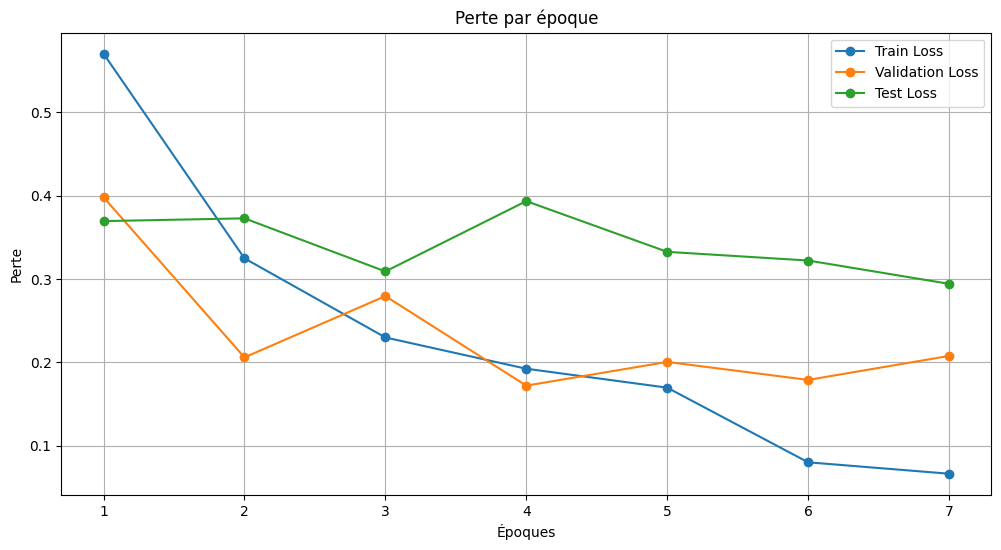

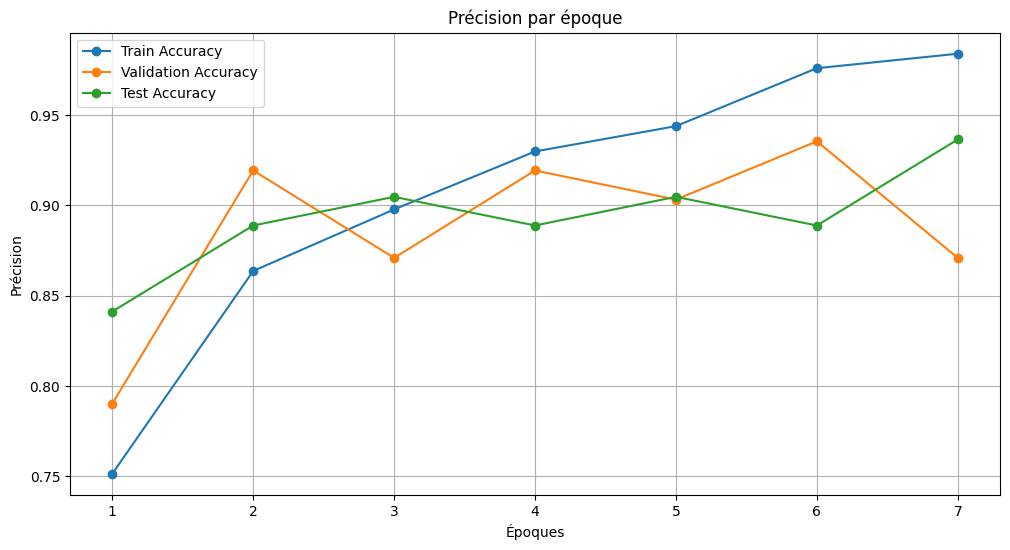

In [ ]:
# Affiche les courbes de perte et d'accuracy
def plot_metrics(train_losses, val_losses, test_losses, train_accuracies, val_accuracies, test_accuracies):
    """Affiche les courbes de perte et d'accuracy sur plusieurs époques."""

    # Génère une liste d'époques
    epochs = XXX(1, len(train_losses) XXX)

    # --- Courbe des pertes (loss) ---
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_losses, label='Train Loss', marker='o')  # Courbe de perte d'entraînement
    plt.plot(epochs, val_losses, label='Validation Loss', marker='o')  # Courbe de perte de validation
    plt.plot(epochs, test_losses, label='Test Loss', marker='o')  # Courbe de perte de test
    plt.xlabel('Époques')  # Label de l'axe des X
    plt.ylabel('Perte')  # Label de l'axe des Y
    plt.title('Perte par époque')  # Titre du graphique
    XXX()  # Affiche la légende pour les courbes
    XXX(True)  # Ajoute la grille
    XXX()  # Affiche le graphique

    # --- Courbe des précisions (accuracy) ---
    plt.figure(XXX=(12, 6))
    plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')  # Courbe de précision d'entraînement
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='o')  # Courbe de précision de validation
    XXX(epochs, test_accuracies, label='Test Accuracy', marker='o')  # Courbe de précision de test
    plt.xlabel('Époques')  # Label de l'axe des X
    plt.ylabel('Précision')  # Label de l'axe des Y
    plt.title('Précision par époque')  # Titre du graphique
    XXX()  # Affiche la légende pour les courbes
    plt.grid(True)  # Ajoute la grille
    XXX()  # Affiche le graphique

# Afficher les courbes de loss et d'accuracy
plot_metrics(train_losses, val_losses, test_losses, train_accuracies, val_accuracies, test_accuracies)


**B19: Fonction principale pour exécuter le pipeline complet (CNN)**



Test Loss: 0.3933, Test Accuracy: 0.8889
Rapport de classification:
              precision    recall  f1-score   support

     Class 0       1.00      0.68      0.81        22
     Class 1       0.85      1.00      0.92        41

    accuracy                           0.89        63
   macro avg       0.93      0.84      0.87        63
weighted avg       0.91      0.89      0.88        63



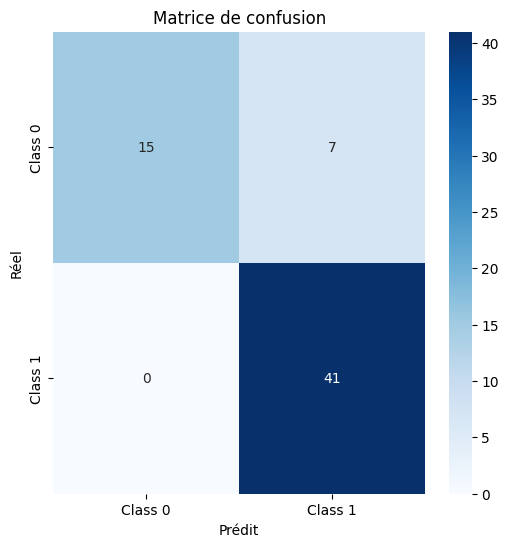

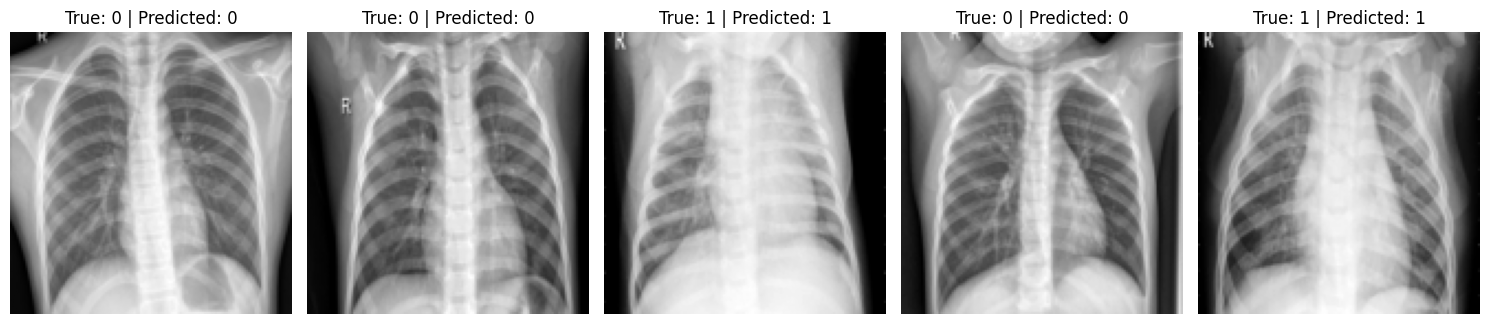

In [ ]:
# Charger le meilleur modèle sauvegardé en mode sécurisé (weights_only=True)
XXX.load_state_dict(torch.load("XXX", weights_only=True))

# Tester le modèle
XXX(model, XXX, criterion, XXX)

**B20: Définition des transformations pour InceptionV3**



In [ ]:

# Définir les transformations d'image
def get_image_transforms(image_size=(299, 299)):
    """Définit les transformations d'image pour l'entraînement et la validation."""
    transform_inception = transforms.Compose([
        transforms.Resize(image_size),  # Redimensionner pour InceptionV3
        transforms.Grayscale(num_output_channels=XXX),  # Convertir en grayscale
        transforms.XXX(),  # Convertir en tenseur
        transforms.XXX(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalisation
    ])
    return transform_inception

# Charger les transformations
XXX = XXX()

**B21: Chargement et partitionnement du dataset pour InceptionV3**




In [ ]:
# Charge le dataset à partir d'un répertoire donné
def load_dataset(data_dir, transform):
    """Charge le dataset ImageFolder avec les transformations spécifiées."""
    return datasets.ImageFolder(root=data_dir, transform=transform)
    # Utilise ImageFolder pour charger les images à partir du répertoire spécifié

# Charger le dataset
dataset = load_dataset(data_dir, transform_inception)

In [ ]:
# # Charger le dataset
dataset = load_dataset(data_dir, transform_inception)

# # Diviser le dataset
train_dataset, val_dataset, test_dataset = split_dataset(dataset)

# # Créer les DataLoaders
train_loader, val_loader, test_loader = create_dataloaders(train_dataset, val_dataset, test_dataset, batch_size)

**B22: Création du modèle InceptionV3**


In [ ]:
def create_model1(num_classes=2):
    model1 = XXX.inception_v3(weights='DEFAULT')  # Charger le modèle pré-entraîné
    model1.XXX = XXX.Linear(model1.fc.in_features, XXX)  # Modifier la couche de sortie
    return model1
# Instancier le modèle
# model1 = create_model1()
model1 = XXX(num_classes).to(device)
# Afficher la structure textuelle
print(XXX)


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

**B22: Affichage du résumé  + Visualisation du graphe de calcul pour InceptionV3**



In [ ]:
from torchsummary import summary

# Afficher le résumé du modèle
XXX(XXX, input_size=(XXX))  # InceptionV3 attend des images de taille 299x299

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 149, 149]             864
       BatchNorm2d-2         [-1, 32, 149, 149]              64
       BasicConv2d-3         [-1, 32, 149, 149]               0
            Conv2d-4         [-1, 32, 147, 147]           9,216
       BatchNorm2d-5         [-1, 32, 147, 147]              64
       BasicConv2d-6         [-1, 32, 147, 147]               0
            Conv2d-7         [-1, 64, 147, 147]          18,432
       BatchNorm2d-8         [-1, 64, 147, 147]             128
       BasicConv2d-9         [-1, 64, 147, 147]               0
        MaxPool2d-10           [-1, 64, 73, 73]               0
           Conv2d-11           [-1, 80, 73, 73]           5,120
      BatchNorm2d-12           [-1, 80, 73, 73]             160
      BasicConv2d-13           [-1, 80, 73, 73]               0
           Conv2d-14          [-1, 192,

**B24:Configuration de la fonction de perte et de l'optimiseur pour InceptionV3**

In [ ]:
# Définir la fonction de perte, l'optimiseur et le scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

**B25: Fonction d'évaluation pour InceptionV3**



In [ ]:
# Fonction d'évaluation du modèle
def evaluate_model1(model1, data_loader, criterion, device):
    model1.eval()  # Met le modèle en mode évaluation (désactive le dropout et la normalisation par lot)

    running_loss, correct, total = 0.0, 0, 0  # Initialise les compteurs pour la perte, le nombre de prédictions correctes et le total d'échantillons
    y_true, y_pred = [], []  # Listes pour stocker les étiquettes réelles et prédites

    with torch.no_grad():  # Désactive le calcul du gradient pour économiser la mémoire et accélérer l'évaluation
        for images, labels in data_loader:  # Boucle sur le DataLoader contenant les données de test ou validation
            images, labels = images.to(device), labels.to(device)  # Envoie les données sur l'appareil (CPU ou GPU)
            outputs = model1(images)  # Passe les images dans le modèle pour obtenir les prédictions

            if isinstance(outputs, tuple):  # Gestion spécifique à InceptionV3 (qui retourne plusieurs sorties)
                outputs = outputs[0]  # Prend uniquement la sortie principale du réseau

            loss = criterion(outputs, labels)  # Calcule la perte entre les prédictions et les labels réels
            running_loss += loss.item()  # Ajoute la perte au compteur global

            _, predicted = torch.max(outputs, 1)  # Prend l'indice de la classe ayant la plus grande probabilité
            correct += (predicted == labels).sum().item()  # Compte le nombre de prédictions correctes
            total += labels.size(0)  # Compte le nombre total d'exemples traités

            y_true.extend(labels.cpu().numpy())  # Stocke les vraies étiquettes sous forme de liste
            y_pred.extend(predicted.cpu().numpy())  # Stocke les prédictions sous forme de liste

    avg_loss = running_loss / len(data_loader)  # Calcule la perte moyenne sur l'ensemble des données
    accuracy = correct / total  # Calcule l'exactitude du modèle

    return avg_loss, accuracy, y_true, y_pred  # Retourne la perte moyenne, l'exactitude et les étiquettes vraies/prédites


**B26: Fonction d'entraînement pour InceptionV3**



In [ ]:
# Fonction d'entraînement du modèle
def train_model1(model1, train_loader, val_loader, test_loader, criterion, optimizer, scheduler, device, epochs, patience):
    best_val_loss = float('inf')  # Initialise la meilleure perte de validation à l'infini (pour suivre la meilleure itération)
    patience_counter = 0  # Compteur pour l'early stopping
    train_losses, val_losses, test_losses = [], [], []  # Listes pour stocker les pertes à chaque époque
    train_accuracies, val_accuracies, test_accuracies = [], [], []  # Listes pour stocker les précisions à chaque époque

    for epoch in range(epochs):  # Boucle sur le nombre total d'époques
        model1.train()  # Met le modèle en mode entraînement
        running_loss, correct_train, total_train = 0.0, 0, 0  # Initialisation des compteurs de perte, exactitude et nombre total d'exemples

        train_loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [Train]", leave=False)  # Barre de progression pour le suivi de l'entraînement
        for images, labels in train_loop:  # Boucle sur les mini-batches du DataLoader d'entraînement
            images, labels = images.to(device), labels.to(device)  # Déplacement des images et labels sur le bon appareil (CPU/GPU)
            optimizer.zero_grad()  # Réinitialisation des gradients avant la rétropropagation
            outputs = model1(images)  # Passage des images à travers le modèle pour obtenir les prédictions

            if isinstance(outputs, tuple):  # Gestion spécifique pour InceptionV3 qui retourne plusieurs sorties
                outputs = outputs[0]  # On utilise uniquement la sortie principale

# Le premier élément est la sortie principale du modèle (les logits pour chaque classe).
# Le deuxième élément contient des informations supplémentaires comme les prédictions auxiliaires.

            loss = criterion(outputs, labels)  # Calcul de la perte entre les sorties et les labels réels
            loss.backward()  # Calcul des gradients via la rétropropagation
            optimizer.step()  # Mise à jour des poids du modèle
            running_loss += loss.item()  # Ajout de la perte au compteur global

            _, predicted = torch.max(outputs, 1)  # Extraction de la classe avec la plus grande probabilité
            correct_train += (predicted == labels).sum().item()  # Comptage des prédictions correctes
            total_train += labels.size(0)  # Mise à jour du nombre total d'échantillons

            train_loop.set_postfix(loss=loss.item())  # Mise à jour de la barre de progression avec la perte actuelle

        # Calcul des métriques pour cette époque
        train_loss = running_loss / len(train_loader)  # Moyenne des pertes sur l'ensemble des batches
        train_accuracy = correct_train / total_train  # Précision du modèle sur l'ensemble d'entraînement
        train_losses.append(train_loss)  # Stocke la perte d'entraînement
        train_accuracies.append(train_accuracy)  # Stocke la précision d'entraînement

        # Évaluation sur les ensembles de validation et de test
        val_loss, val_accuracy, _, _ = evaluate_model1(model1, val_loader, criterion, device)  # Évaluation sur l'ensemble de validation
        val_losses.append(val_loss)  # Stocke la perte de validation
        val_accuracies.append(val_accuracy)  # Stocke la précision de validation

        test_loss, test_accuracy, _, _ = evaluate_model1(model1, test_loader, criterion, device)  # Évaluation sur l'ensemble de test
        test_losses.append(test_loss)  # Stocke la perte de test
        test_accuracies.append(test_accuracy)  # Stocke la précision de test

        # Affichage des résultats de l'époque en cours
        print(f"Epoch {epoch+1}/{epochs} - "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f} - "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f} - "
              f"Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}")

        # Early stopping et sauvegarde du meilleur modèle basé sur la perte de validation
        if val_loss < best_val_loss:  # Si la perte de validation diminue, on enregistre le modèle
            best_val_loss = val_loss  # Mise à jour de la meilleure perte
            patience_counter = 0  # Réinitialisation du compteur de patience
            torch.save(model1.state_dict(), "best_model1.pth")  # Sauvegarde des poids du modèle
        else:  # Si la perte de validation n'améliore pas
            patience_counter += 1  # Incrémentation du compteur de patience
            if patience_counter >= patience:  # Si le modèle n'a pas progressé pendant "patience" époques
                print(f"Early stopping at epoch {epoch+1}")  # Affichage du message d'arrêt anticipé
                break  # Arrêt de la boucle d'entraînement

        scheduler.step()  # Mise à jour du taux d'apprentissage avec le scheduler

    return train_losses, train_accuracies, val_losses, val_accuracies, test_losses, test_accuracies  # Retour des résultats

# Entraînement du modèle
train_losses, train_accuracies, val_losses, val_accuracies, test_losses, test_accuracies = train_model1(
    model1, train_loader, val_loader, test_loader, criterion, optimizer, scheduler, device, epochs, patience
)


Epoch 1/30 - Train Loss: 0.4966, Train Acc: 0.7455 - Val Loss: 0.3731, Val Acc: 0.8548 - Test Loss: 0.4735, Test Acc: 0.7937


Epoch 2/30 - Train Loss: 0.3313, Train Acc: 0.8597 - Val Loss: 0.1340, Val Acc: 0.9677 - Test Loss: 0.2245, Test Acc: 0.9365


Epoch 3/30 - Train Loss: 0.2476, Train Acc: 0.9138 - Val Loss: 3.1819, Val Acc: 0.5323 - Test Loss: 5.3761, Test Acc: 0.5079


Epoch 4/30 - Train Loss: 0.3033, Train Acc: 0.8697 - Val Loss: 0.1483, Val Acc: 0.9839 - Test Loss: 0.2715, Test Acc: 0.8889


Epoch 5/30 - Train Loss: 0.2415, Train Acc: 0.9118 - Val Loss: 0.3830, Val Acc: 0.8065 - Test Loss: 0.2595, Test Acc: 0.8889
Early stopping at epoch 5


**B27: Test du modèle InceptionV3 et affichage des résultats**



In [ ]:

def test_model1(model1, test_loader, criterion, device):
    """Teste le modèle et affiche les résultats."""
    model1.eval()  # Met le modèle en mode évaluation
    y_true, y_pred, images_to_show, labels_to_show, predicted_to_show = collect_test_data1(model1, test_loader, device)

    # Calcul des métriques pour l'ensemble de test
    test_loss, test_accuracy = calculate_test_metrics(model1, test_loader, criterion, device)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Afficher le rapport de classification
    print_classification_report(y_true, y_pred)

    # Afficher la matrice de confusion
    plot_confusion_matrix(y_true, y_pred)

    # Afficher quelques images avec leurs prédictions
    display_test_images(images_to_show, labels_to_show, predicted_to_show)

**B28: Affichage des images de test avec leurs prédictions et étiquettes réelles pour inception_v3**

In [ ]:
def collect_test_data1(model1, test_loader, device):
    """Collecte les données de test: vraies étiquettes, prédictions et images."""
    model1.eval()  # Mode évaluation
    y_true, y_pred = [], []
    images_to_show, labels_to_show, predicted_to_show = [], [], []

    with torch.no_grad():  # Pas de calcul des gradients
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model1(images)  # Prédictions du modèle
            if isinstance(outputs, tuple):  # Si les sorties sont un tuple (InceptionV3)
                outputs = outputs[0]
            _, predicted = torch.max(outputs, 1)  # Prédictions (classe avec la probabilité maximale)
            y_true.extend(labels.cpu().numpy())  # Ajout des véritables labels
            y_pred.extend(predicted.cpu().numpy())  # Ajout des prédictions
            images_to_show.extend(images.cpu())  # Ajout des images à afficher
            labels_to_show.extend(labels.cpu().numpy())  # Ajout des véritables labels
            predicted_to_show.extend(predicted.cpu().numpy())  # Ajout des prédictions
    return y_true, y_pred, images_to_show, labels_to_show, predicted_to_show




**B29: Affichage des courbes de perte et d'accuracy du model Inception V3**



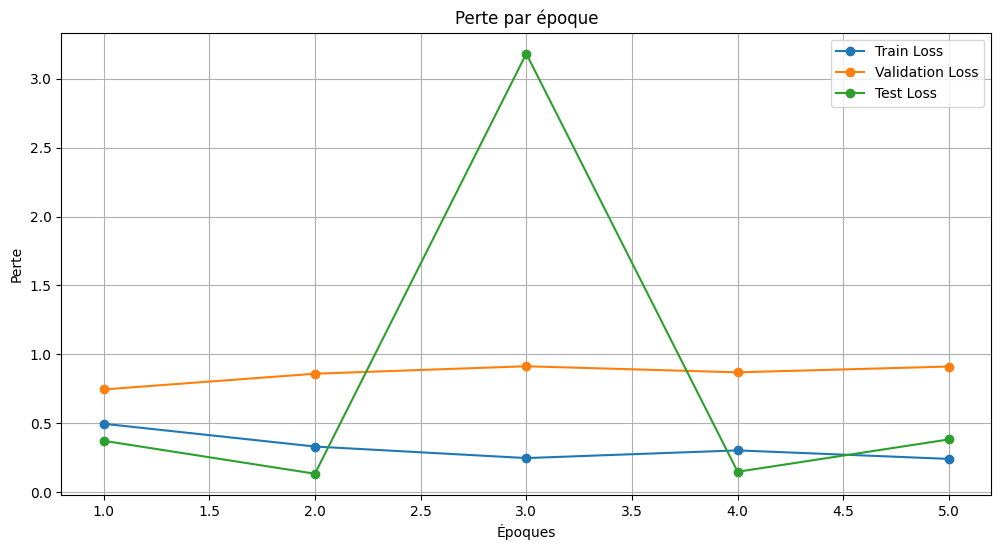

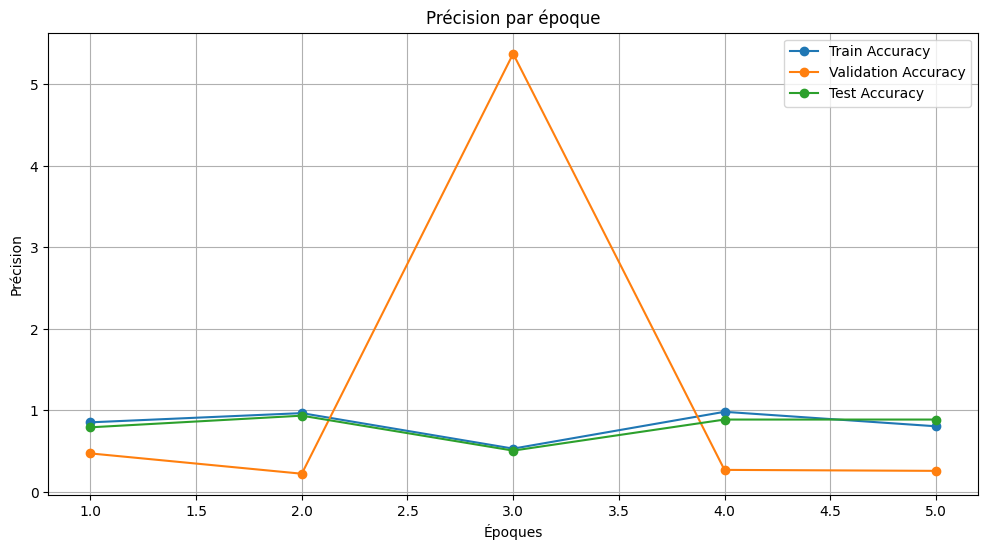

In [ ]:

plot_metrics(train_losses, train_accuracies, val_losses, val_accuracies, test_losses, test_accuracies)


**B30:Fonction principale pour exécuter le piepline complet (InceptionV3)**



Test Loss: 0.2245, Test Accuracy: 0.9365
Rapport de classification:
              precision    recall  f1-score   support

     Class 0       0.96      0.90      0.93        29
     Class 1       0.92      0.97      0.94        34

    accuracy                           0.94        63
   macro avg       0.94      0.93      0.94        63
weighted avg       0.94      0.94      0.94        63



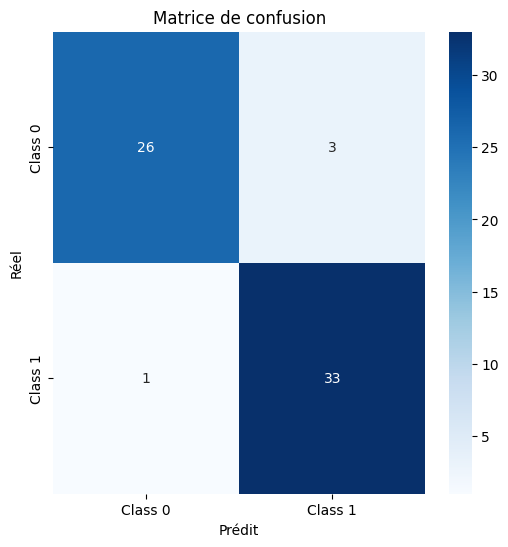

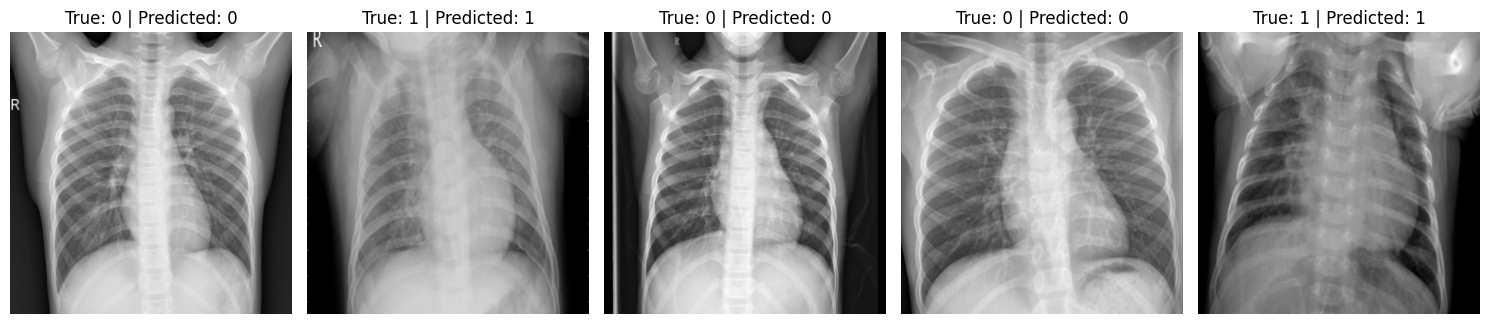

In [ ]:
# Charger le modèle avec weights_only=True
model1.load_state_dict(torch.load("best_model1.pth", weights_only=True))

# Tester le modèle
test_model1(model1, test_loader, criterion, device)